In [2]:
import os
import sys
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent)

print(utilities_dir)

if utilities_dir not in sys.path:
	sys.path.append(utilities_dir)

/eos/home-k/kaanders/SWAN_projects/lhcdata-signal-monitoring


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utilities.signal import signal as s
from datetime import datetime, timedelta

print("Create pandas DataFrame")

Fs = 8000
f = 5
sample = 1000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)

date_today = datetime.now()
days = pd.date_range(date_today, date_today + timedelta(len(x)-1), freq='D')

df = pd.DataFrame({'test': days, 'col2': y})
df = df.set_index('test')

print(df)

print("Create signal instance")
sw_signal = s.Signal(df_=df, label_='sine_wave', unit_='unit')
sw_signal.df.plot()
sw_signal.write()

ModuleNotFoundError: No module named 'utilities.signal_influx'

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev3python3/Wed/x86_64-centos7-gcc7-opt/lib/python3.6/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


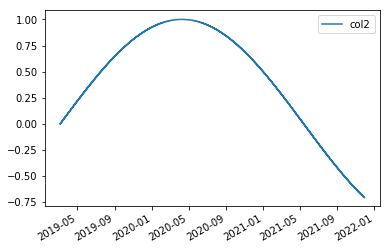

In [3]:
sw_signal_queried = s.Signal(label_='sine_wave')
sw_signal_queried.read()
sw_signal_queried.df.plot()